<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/1.%20Data%20Science%20Fundamentals/Examen_1_Desercion_laboral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")
#habilitacion de drive para montar datos

Mounted at /content/drive


In [ ]:
#librerias a importar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#declaracion de variable a ruta de archivo a analizar
filename = "/content/drive/MyDrive/Data CodingDojo/Mod_employee_attrition - Temp employee_attrition.csv"


df = pd.read_csv(filename)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,752,3760,195520,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,448,2240,116480,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


1) The first step in this process is to use Python to clean the data to get it ready for analysis. You must:

Identify and address any duplicate values: Done

Identify and address any missing values in this dataset. Deal with these 
appropriately. Include a brief description of the     method you used to deal with missing values along with a justification for that method.

Ensure all columns match the data types listed in the data dictionary.

Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)

Identify and address any inappropriate or unusual data points (example: age cannot be 325)


# Analisis de dataframe

Contiene:

1475 registros -
35 columnas

In [ ]:
df.info() # para obtener numero de columnas y registros tambien hubiera servido .shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1475 non-null   int64 
 1   Attrition                 1475 non-null   object
 2   BusinessTravel            1475 non-null   object
 3   Department                1475 non-null   object
 4   DistanceFromHome          1475 non-null   int64 
 5   Education                 1475 non-null   int64 
 6   EducationField            1475 non-null   object
 7   EmployeeCount             1475 non-null   int64 
 8   EmployeeNumber            1475 non-null   int64 
 9   EnvironmentSatisfaction   1475 non-null   int64 
 10  Gender                    590 non-null    object
 11  HourlyRate                1475 non-null   object
 12  JobInvolvement            1475 non-null   int64 
 13  JobLevel                  1475 non-null   int64 
 14  JobRole                 

#1. Identify and address any duplicate values

se almacenan duplicados en variable: registros_duplicados

luego se muestran en dataframe para su identificacion

por ultimo se crea dataframe nuevo, eliminando los registros duplicados



In [ ]:
# buscamos elementos duplicados con .duplicated()
registros_duplicados = df.duplicated()
registros_duplicados.sum()

5

In [ ]:
df[registros_duplicados]#registros duplicados dentro del dataframe indice[14,159,625,815,1145]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
14,34,No,Travel_Rarely,Research & Development,19,2,Medical,1,18,2,NaN,93,3,1,Laboratory Technician,4,Divorced,744,3720,193440,0,Y,No,11,3,3,80,1,3,2,3,2,2,1,2
159,58,No,Travel_Rarely,Research & Development,9,3,Medical,1,214,2,Female,75,2,1,Research Scientist,2,Married,600,3000,156000,4,Y,Yes,20,4,2,80,1,9,3,2,1,0,0,0
625,32,No,Travel_Rarely,Sales,13,4,Life Sciences,1,859,2,NaN,73,3,2,Sales Executive,4,Divorced,584,2920,151840,2,Y,No,11,3,3,80,1,8,3,2,5,2,0,3
815,38,No,Travel_Rarely,Sales,2,2,Marketing,1,1125,4,NaN,32,3,3,Sales Executive,2,Single,256,1280,66560,7,Y,No,16,3,3,80,0,10,2,3,1,0,0,0
1145,44,No,Travel_Rarely,Research & Development,7,3,Medical,1,1608,2,Female,31,3,5,Research Director,4,Divorced,248,1240,64480,0,Y,Yes,14,3,4,80,1,23,4,2,22,7,1,10


In [ ]:
df_limpio = df.drop_duplicates(keep = 'first') # creamos nuevo dataframe sin duplicados, keep=first mantiene uno de los registros duplicados, el primero.
df_limpio.duplicated().sum()# comprobacion de que todo salio ok

0

Analisis de primeras 5 columnas y ultimas 5

In [ ]:
df_limpio.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,752,3760,195520,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,448,2240,116480,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df_limpio.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1470,36,No,Travel_Frequently,Research & Development,23,2,Medical,1,2061,3,NaN,41,4,2,Laboratory Technician,4,Married,328,1640,85280,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1471,39,No,Travel_Rarely,Research & Development,6,1,Medical,1,2062,4,NaN,42,2,3,Healthcare Representative,1,Married,336,1680,87360,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1472,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,2064,2,NaN,87,4,2,Manufacturing Director,2,Married,696,3480,180960,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1473,49,No,Travel_Frequently,Sales,2,3,Medical,1,2065,4,NaN,63,2,2,Sales Executive,2,Married,504,2520,131040,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1474,34,No,Travel_Rarely,Research & Development,8,3,Medical,1,2068,2,NaN,82,4,2,Laboratory Technician,3,Married,656,3280,170560,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


#2. Identify and address any missing values in this dataset. Deal with these appropriately. Include a brief description of the     method you used to deal with missing values along with a justification for that method.

In [ ]:
# Segun lo visto con df.info() la columna Gender presenta nulos
df_limpio.isna().sum()
# 882 registros nulos precisamente

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                      882
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
DailyRate                     0
WeeklyRate                    0
YearlyRate                    0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
df_limpio["Gender"].value_counts()

Female    588
Name: Gender, dtype: int64

Luego de aplicar un .value_counts() a columna gender, nos damos cuenta que ademas de presentar nulos, no tiene registros de individuos masculinos.

es dificil asumir que todos los nulos corresponden a masculinos, ya que por distintos motivos, un individuo puede no sentirse identificado como masculino o femenino.

por ende, de una manera neutral. se llenaran los registros faltantes con "No informa" y se presentara una solicitud de actualizacion de datos al area de RRHH


# edicion
diccionario de datos indica que columna lleva registros male o female, por ende se opta por llenar nulos con male


In [ ]:
# identificacion y visualizacion basica de registros nulos
df_limpio[df_limpio["Gender"].isna()]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,1,8,4,...,3,80,0,8,2,2,7,7,3,6
7,30,No,Travel_Rarely,Research & Development,24,1,Life Sciences,1,11,4,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,36,No,Travel_Frequently,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1471,39,No,Travel_Rarely,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1472,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1473,49,No,Travel_Frequently,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df_limpio["Gender"].fillna("male", inplace = True) # inplace=True permite la modificacion de df original

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# comprobacion de nulos arroja resultados positivos luego de llenar gender con "No informa"
df_limpio.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
DailyRate                   0
WeeklyRate                  0
YearlyRate                  0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df_limpio["Gender"].value_counts() # se confirma el hecho de registros masculinos faltantes, lo cual sera mencionado al area de RRHH para su revision o actualizacion.
# luego de revision de diccionario se opta por llenar con male, pues solo indica female o male

male      882
Female    588
Name: Gender, dtype: int64

# 3. Ensure all columns match the data types listed in the data dictionary.


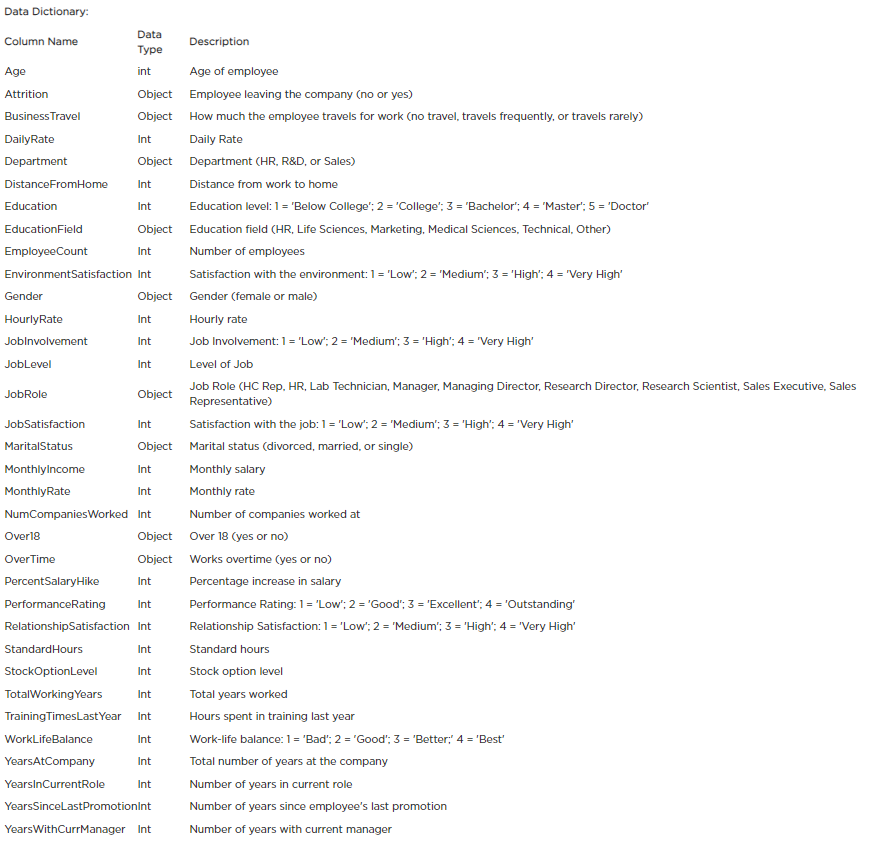

In [ ]:
#aplicamos nuevamente un df_limpio.info() para comparar data types de columnas con el diccionario otorgado
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   object
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

# Observaciones con respecto al diccionario de datos

### Gender indica que es female o male. 

relleno de datos nulos de columna gender se llenan con informacion otorgada por diccionario de datos


#### COLUMNAS CON DIFERENTE DATA TYPE

HourlyRate deberia ser int pero esta como object

YearsAtComprany deberia ser int pero esta como object


# COLUMNAS  NO ESTAN EN DATAFRAME


## Con respecto a estas columnas, como se trata de salarios es probable que para evitar problemas entre trabajadores o filtracion de informacion se haya decidido no exportar a conjunto de datos otorgados 
MonthlyIncome

MonthlyRate 


# COLUMNAS ESTAN EN DATAFRAME PERO NO EN DICCIONARIO
EmployeeNumber

No es una columna con un dato relevante para el analisis a realizar. de todas formas se informara al area que corresponda.

# Cambio de datatype a columna

HourlyRate

In [ ]:
#Trabajo en columnas con data type distinto
df_limpio["HourlyRate"] # primera vista a columna afectada

0       94
1       61
2       92
3       56
4       40
        ..
1470    41
1471    42
1472    87
1473    63
1474    82
Name: HourlyRate, Length: 1470, dtype: object

In [ ]:
# primer intento de cambio de data type
df_limpio["HourlyRate"] = df_limpio["HourlyRate"].astype(int)

ValueError: ignored

In [ ]:
df_limpio["HourlyRate"].value_counts() # se identifica valor incorrecto al final

66     29
98     28
84     28
42     28
48     28
       ..
53     14
68     14
38     13
34     12
94_     1
Name: HourlyRate, Length: 72, dtype: int64

In [ ]:
# aplicamos el siguiente codigo para ver en mas detalles columna "HourlyRate"
pd.options.display.max_columns = None

# fuente: https://es.stackoverflow.com/questions/254953/mostrar-todas-las-columnas-de-un-dataframe

In [ ]:
# ValueError: invalid literal for int() with base 10: '94_'
# nos colgamos de error mostrado para buscar el dato

df_limpio[df_limpio["HourlyRate"] == "94_"]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
9,36,No,Travel_Rarely,Research & Development,27,3,Medical,1,13,3,male,94_,3,2,Healthcare Representative,3,Married,752,3760,195520,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
df_limpio.head() # se compara registro anterior con otros registros "sanos" 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,752,3760,195520,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,male,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,male,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,448,2240,116480,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,male,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# como columna corresponde a INT, y valor apreciable esta acuerdo a los demas registrados, se procede a limpieza de caracter _
df_limpio.loc[9, "HourlyRate"] = 94

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# al consultar valor nuevamente este no arroja resultado
df_limpio[df_limpio["HourlyRate"] == "94_"]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [ ]:
df_limpio["HourlyRate"].value_counts() # value counts ya no arroja valores fuera de lo normal

66    29
98    28
84    28
42    28
48    28
      ..
53    14
68    14
38    13
34    12
94     1
Name: HourlyRate, Length: 72, dtype: int64

In [ ]:
# segundo intento para cambiar data type
df_limpio["HourlyRate"] = df_limpio["HourlyRate"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_limpio.info() # Se puede apreciar cambio de data type exitoso!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

# Cambio de datatype a columna

YearsAtCompany            

In [ ]:
# primer intento con mismo codigo aplicado a HourlyRate
df_limpio["YearsAtCompany"] = df_limpio["YearsAtCompany"].astype(int)

ValueError: ignored

In [ ]:
df_limpio["YearsAtCompany"].value_counts() #se identifica registro con problemas y la ocurrencia de 1 vez

5     195
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
5!      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

In [ ]:
df_limpio[df_limpio["YearsAtCompany"] == "5!"]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
36,43,No,Travel_Rarely,Research & Development,2,2,Medical,1,46,4,Female,72,4,1,Research Scientist,3,Divorced,576,2880,149760,1,Y,No,12,3,4,80,2,6,3,2,5!,3,1,4


In [ ]:
#analizando sus working years, se deduce que el valor 5 es correcto y fue un error de tipeo por ende se procedera a limpiar el valor
df_limpio.loc[36, "YearsAtCompany"] = 5

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_limpio[df_limpio["YearsAtCompany"] == "5!"] # una nueva busqueda, esta ves sin resultado, nos indica una limpieza exitosa

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [ ]:
#Segundo intento para cambiar data type, exitoso tras la limpieza del dato
df_limpio["YearsAtCompany"] = df_limpio["YearsAtCompany"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

#4 Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)

Columna Department posee una definicion sin abreviacion de cada area, en contraste a diccionario, aun asi no se encuentra necesidad de corregir ya que es consistente

Over18 en lugar de "yes" indica "y" lo cual no deja de ser consistente

In [ ]:
df_limpio["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# luego de revisar todas las columnas categoricas con value counts, no se encuentra necesidad de cambiar ciertas diferencias con respecto a definicion del diccionario de datos, pues estos datos no pierden consistencia

# 5. Identify and address any inappropriate or unusual data points (example: age cannot be 325)


In [ ]:
# aplicaremos .describe() para notar los valores maximos de cada valor numerico para su revision
df_limpio.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,37.277551,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,527.129252,2635.646259,137053.605442,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,16.802435,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,162.635421,813.177104,42285.209396,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,240.000000,1200.000000,62400.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,384.000000,1920.000000,99840.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,528.000000,2640.000000,137280.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,670.000000,3350.000000,174200.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,578.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,800.000000,4000.000000,208000.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df_limpio[df_limpio["Age"] == 578]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
99,578,No,Travel_Rarely,Sales,10,4,Medical,1,131,4,male,37,3,4,Sales Executive,3,Single,296,1480,76960,0,Y,No,13,3,3,80,0,38,1,2,37,10,1,8


Luego de revisar cada columna se aprecia en "Age" una edad maxima de 578 la cual sera abordada a continuacion

MaritalStatus = Single

Age = 578

TotalWorkingYears = 38

YearsAtCompany = 37

NumCompaniesWorked = 0


Segun las columnas de interes no es posible saber con certeza si el individuo tiene 57 o 78 a;ios por lo que se descarta de dataframe

In [ ]:
df_limpio[df_limpio["Age"] != 578].describe()# un segundo describe, sin contar la edad de 578 nos arroja valores maximo normales

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1469.000000,1469.000000,1469.000000,1469.0,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.0,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000
mean,36.909462,9.191967,2.912185,1.0,1025.473792,2.720899,65.910824,2.729748,2.062628,2.728387,527.286590,2636.432948,137094.513274,2.695031,15.211028,3.153846,2.712049,80.0,0.794418,11.261402,2.800545,2.761743,6.987747,4.225323,2.188564,4.120490
std,9.121902,8.109598,1.024121,0.0,601.776988,1.092945,20.322356,0.711769,1.106163,1.103199,162.578852,812.894259,42270.501481,2.497870,3.660730,0.360924,1.081551,0.0,0.852115,7.752104,1.288854,0.706437,6.078381,3.621238,3.223378,3.567916
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,240.000000,1200.000000,62400.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,492.000000,2.000000,48.000000,2.000000,1.000000,2.000000,384.000000,1920.000000,99840.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,528.000000,2640.000000,137280.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,1556.000000,4.000000,84.000000,3.000000,3.000000,4.000000,672.000000,3360.000000,174720.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,800.000000,4000.000000,208000.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df_final = df_limpio[df_limpio["Age"] != 578] # dejamos un df_final para comenzar los graficos

df_final

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,752,3760,195520,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,male,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,male,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,448,2240,116480,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,male,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,36,No,Travel_Frequently,Research & Development,23,2,Medical,1,2061,3,male,41,4,2,Laboratory Technician,4,Married,328,1640,85280,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1471,39,No,Travel_Rarely,Research & Development,6,1,Medical,1,2062,4,male,42,2,3,Healthcare Representative,1,Married,336,1680,87360,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1472,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,2064,2,male,87,4,2,Manufacturing Director,2,Married,696,3480,180960,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1473,49,No,Travel_Frequently,Sales,2,3,Medical,1,2065,4,male,63,2,2,Sales Executive,2,Married,504,2520,131040,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


# Parte 2, graficos

2) The next step is to complete an exploration based on the data using Python. This should include:

Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.



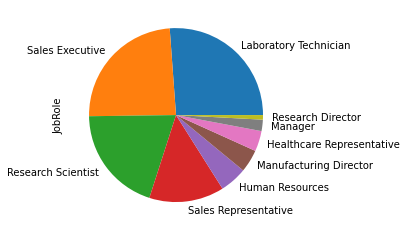

In [ ]:
#se declara filtro para aplicacion de grafico
attrition = df_final["Attrition"] == "Yes"
overtime = df_final["OverTime"] == "Yes"

df_final[attrition]["JobRole"].value_counts().plot(kind="pie", )


Como se muestra arriba, se puede apreciar los cargos con una mayor cantidad de desgaste laboral (attrition se represento como desgaste segun traductor de google) los cuales estan mas propensos a dejar de trabajar.

con esto se pueden idear politicas de retencion en los cargos con valores muy altos.

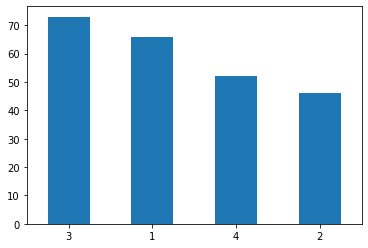

In [ ]:
df_final[attrition]["JobSatisfaction"].value_counts().plot(kind="bar")
plt.xticks(rotation="horizontal");# mejor la visibilidad de las etiquetaX

Un sencillo grafico que nos muestra el nivel de satisfaccion de los empleados con desgaste laboral

Donde: 1 = 'Low'; 2 = 'Medium'; 3 = 'High'; 4 = 'Very High' .

si se ataca el nivel 1 y 2 se podria reducir considerablemente la desercion laboral


# Parte 2, graficos

Two different types of multivariate exploratory visualizations.  Each visualization must include a brief interpretation within the code file.

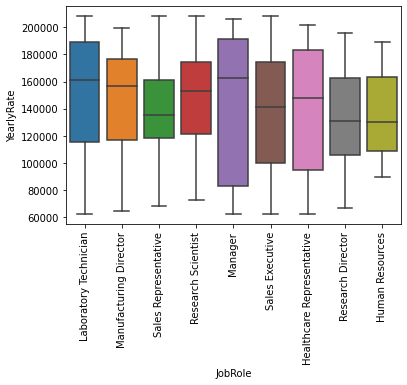

In [ ]:
# boxplot
satisfaction = df_final["JobSatisfaction"] == 1
grafico_multi_1 = sns.boxplot(x="JobRole", y="YearlyRate", data=df_final[satisfaction])
grafico_multi_1.set_xticklabels(grafico_multi_1.get_xticklabels(),rotation = 90);# pedazo de codigo cortesia de :https://www.delftstack.com/es/howto/seaborn/rotate-tick-labels-seaborn/


Grafico de sueldos por job role de empresa, filtrado por un nivel de satisfaccion del trabajo bajo.
no se aprecian outliers.
requerido para evaluacion e implementacion de politicas de satisfaccion que puedan ayudar al rendimiento.

se puede apreciar el rol de manager con una mayor variabilidad por debajo de la media lo cual puede coincidir con su nivel de satisfaccion 

In [ ]:
df_limpio.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,752,3760,195520,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,male,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,male,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,448,2240,116480,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,male,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


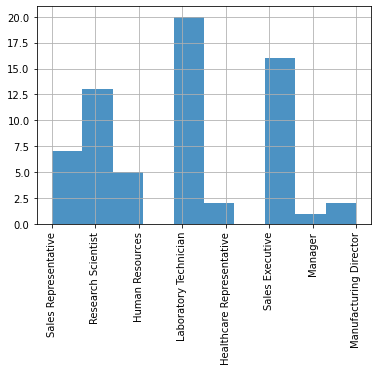

In [ ]:
df_final[attrition & satisfaction]["JobRole"].hist(alpha=.8)
plt.xticks(rotation=90);# mejor la visibilidad de las etiquetaX

Se realiza histograma con los cargos con mayor negatividad laboral, por decirlo de alguna forma, filtrando por attrition y satisfaction ( igual a 1) con esto se aprecia con mas fuerza los lugardes donde aplicar politicas de mejora de ambiente para evitar la desercion laboral